# Introduction to Quantum Computing: The Grover's Algorithm

This notebook provides a comprehensive introduction to Grover's algorithm, a quantum algorithm for unstructured search problems. We'll explore the theoretical foundations, mathematical formulation, and implementation using Qiskit.

## Table of Contents

1. [Introduction to Quantum Search](#introduction)
2. [The Classical Search Problem](#classical-problem)
3. [Grover's Algorithm: Theoretical Foundation](#theoretical-foundation)
4. [Mathematical Formulation](#mathematical-formulation)
5. [Implementation in Qiskit](#implementation)
6. [Analysis and Visualization](#analysis)
7. [Applications and Extensions](#applications)
8. [Conclusion and Significance](#conclusion)
9. [References](#references)

<a id="introduction"></a>
## 1. Introduction to Quantum Search

Grover's algorithm, developed by Lov Grover in 1996, is a quantum algorithm that provides a quadratic speedup for unstructured search problems. It's one of the most important quantum algorithms and demonstrates a provable quantum advantage over classical algorithms for a practical problem.

The algorithm addresses the problem of finding a specific element in an unsorted database or, more generally, finding an input to a black-box function that produces a specific output. While this might seem like a specialized problem, it has broad applications in computer science, including:

- Database searching
- Solving NP-complete problems
- Cryptanalysis
- Optimization problems

Grover's algorithm leverages quantum superposition and a technique called **amplitude amplification** to enhance the probability of measuring the desired state. This allows it to find a solution with high probability using only $O(\sqrt{N})$ operations, where $N$ is the size of the search space. In contrast, classical algorithms require $O(N)$ operations in the worst case.

<a id="classical-problem"></a>
## 2. The Classical Search Problem

### Problem Statement

Consider the following search problem:

- We have an unsorted database of $N$ items
- We want to find a specific item that satisfies a certain condition
- The only way to check if an item satisfies the condition is to examine it

This can be formalized as finding an input $x$ such that $f(x) = 1$ for a function $f: \{0,1\}^n \rightarrow \{0,1\}$, where $N = 2^n$. The function $f$ is often called an "oracle" or a "black box" because we don't know its internal structure; we can only evaluate it for specific inputs.

### Classical Solution

In the classical setting, if the database is unsorted and we have no additional information about the structure of the problem, the best we can do is to check each item one by one until we find the target. This is essentially a linear search algorithm.

- **Best case**: The target is the first item we check, requiring 1 operation
- **Worst case**: The target is the last item we check, requiring $N$ operations
- **Average case**: We expect to check about $N/2$ items before finding the target

It can be proven that any classical algorithm must examine at least $O(N)$ items in the worst case to solve this problem. This is a fundamental limitation of classical computing.

### The Quantum Advantage

Grover's algorithm provides a quadratic speedup over the classical approach. It can find the target item with high probability using only $O(\sqrt{N})$ operations. While this is not an exponential speedup (like Shor's algorithm for factoring), it is still a significant improvement, especially for large databases.

For example, if we have a database with a million items ($N = 10^6$):
- Classical search: Up to 1,000,000 operations
- Grover's algorithm: Approximately 1,000 operations (square root of a million)

This quadratic speedup becomes increasingly important as the size of the problem grows.

<a id="theoretical-foundation"></a>
## 3. Grover's Algorithm: Theoretical Foundation

Grover's algorithm leverages quantum superposition, interference, and a technique called amplitude amplification to enhance the probability of measuring the desired state.

### Key Insight

The key insight of Grover's algorithm is that we can start with a superposition of all possible states, and then iteratively increase the amplitude (and thus the probability) of the target state while decreasing the amplitudes of all other states. This is achieved through a process called **Grover iteration** or **Grover operator**.

### Quantum Oracle

Similar to other quantum algorithms, Grover's algorithm uses a quantum oracle $U_f$ that encodes the search function $f$. The oracle performs the transformation:

$$U_f|x\rangle = (-1)^{f(x)}|x\rangle$$

This means the oracle flips the phase (adds a negative sign) of the states that satisfy the search condition ($f(x) = 1$), while leaving all other states unchanged.

### Diffusion Operator

After applying the oracle, Grover's algorithm uses a **diffusion operator** (also called the **inversion about the mean** operator) to amplify the amplitude of the target state. This operator can be expressed as:

$$D = 2|s\rangle\langle s| - I$$

where $|s\rangle = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle$ is the uniform superposition of all states, and $I$ is the identity operator.

The diffusion operator reflects the amplitude of each state about the average amplitude of all states. This has the effect of increasing the amplitude of states with below-average amplitude and decreasing the amplitude of states with above-average amplitude.

### Algorithm Steps

1. **Initialization**: Prepare a uniform superposition of all possible states
   $$|s\rangle = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle$$

2. **Grover Iteration**: Repeat the following steps $O(\sqrt{N})$ times:
   - Apply the oracle $U_f$ to flip the phase of the target state
   - Apply the diffusion operator $D$ to amplify the amplitude of the target state

3. **Measurement**: Measure the state, which will yield the target state with high probability

### Optimal Number of Iterations

The optimal number of Grover iterations is approximately:

$$r \approx \frac{\pi}{4}\sqrt{\frac{N}{M}}$$

where $N$ is the size of the search space and $M$ is the number of solutions. For a single solution ($M = 1$), this simplifies to $r \approx \frac{\pi}{4}\sqrt{N}$.

It's important to note that performing too many iterations can actually decrease the probability of success. This is because the amplitudes oscillate, and we want to stop when the amplitude of the target state is at its maximum.

<a id="mathematical-formulation"></a>
## 4. Mathematical Formulation

Let's walk through the mathematical steps of Grover's algorithm to understand why it works.

### Initial State

We start with $n$ qubits in the state $|0\rangle^{\otimes n}$. After applying Hadamard gates to all qubits, we get a uniform superposition of all possible states:

$$|s\rangle = H^{\otimes n}|0\rangle^{\otimes n} = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle$$

where $N = 2^n$ is the size of the search space.

### Grover Iteration

Each Grover iteration consists of two steps: the oracle operation and the diffusion operation.

#### Oracle Operation

The oracle $U_f$ flips the phase of the target state $|\omega\rangle$ (where $f(\omega) = 1$):

$$U_f|x\rangle = \begin{cases}
-|x\rangle & \text{if } x = \omega \\
|x\rangle & \text{if } x \neq \omega
\end{cases}$$

We can express this as:

$$U_f = I - 2|\omega\rangle\langle\omega|$$

where $I$ is the identity operator.

#### Diffusion Operation

The diffusion operator $D$ performs an inversion about the mean:

$$D = 2|s\rangle\langle s| - I$$

This can be implemented as $H^{\otimes n}(2|0\rangle\langle 0| - I)H^{\otimes n}$, which is equivalent to applying Hadamard gates to all qubits, then applying a conditional phase flip that flips the phase of all states except $|0\rangle^{\otimes n}$, and then applying Hadamard gates again.

### Geometric Interpretation

Grover's algorithm can be understood geometrically as a rotation in a two-dimensional subspace spanned by the target state $|\omega\rangle$ and the uniform superposition of all non-target states.

Let's define:
- $|\omega\rangle$: The target state
- $|s'\rangle = \frac{1}{\sqrt{N-1}}\sum_{x \neq \omega}|x\rangle$: The uniform superposition of all non-target states

The initial state $|s\rangle$ can be expressed as:

$$|s\rangle = \frac{1}{\sqrt{N}}|\omega\rangle + \sqrt{\frac{N-1}{N}}|s'\rangle$$

Each Grover iteration rotates the state in the plane spanned by $|\omega\rangle$ and $|s'\rangle$ by an angle $\theta$, where $\sin(\theta/2) = 1/\sqrt{N}$. After $r$ iterations, the state is rotated by an angle $r\theta$.

The optimal number of iterations is the value of $r$ that makes $r\theta$ as close as possible to $\pi/2$, which would align the state with the target state $|\omega\rangle$. This gives us $r \approx \frac{\pi}{4}\sqrt{N}$.

### Success Probability

After $r$ iterations, the probability of measuring the target state is:

$$P(\omega) = \sin^2((2r+1)\theta/2)$$

With the optimal number of iterations, this probability approaches 1 for large $N$.

<a id="implementation"></a>
## 5. Implementation in Qiskit

Now, let's implement Grover's algorithm using Qiskit. We'll first import the necessary libraries:

In [129]:
# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector

# Import NumPy for numerical operations
import numpy as np

# Import Matplotlib for visualization
import matplotlib.pyplot as plt

# For calculating the optimal number of iterations
import math

### Implementing Grover's Algorithm

We'll create a function that implements Grover's algorithm for a given number of qubits and a target state:

In [131]:
def grover_algorithm(n_qubits, target_state):
    """
    Implement Grover's algorithm.
    
    Args:
        n_qubits (int): Number of qubits (log2 of the search space size)
        target_state (str): Binary string representing the target state
    
    Returns:
        QuantumCircuit: The complete Grover's algorithm circuit
    """
    # Create a circuit with n qubits and n classical bits
    grover_circuit = QuantumCircuit(n_qubits, n_qubits)
    
    # Step 1: Initialize in superposition
    for qubit in range(n_qubits):
        grover_circuit.h(qubit)
    
    # Calculate the optimal number of iterations
    N = 2**n_qubits
    iterations = int(math.pi/4 * math.sqrt(N))
    
    # Step 2: Apply Grover iterations
    for _ in range(iterations):
        # Oracle: Flip the phase of the target state
        grover_circuit.barrier()  # For visual separation
        oracle_circuit = create_oracle(n_qubits, target_state)
        grover_circuit = grover_circuit.compose(oracle_circuit)
        
        # Diffusion operator (Inversion about the mean)
        grover_circuit.barrier()  # For visual separation
        diffusion_circuit = create_diffusion(n_qubits)
        grover_circuit = grover_circuit.compose(diffusion_circuit)
    
    # Step 3: Measure all qubits
    grover_circuit.barrier()  # For visual separation
    grover_circuit.measure(range(n_qubits), range(n_qubits))
    
    return grover_circuit

Now, let's implement the oracle and diffusion operator:

In [132]:
def create_oracle(n_qubits, target_state):
    """
    Create an oracle that flips the phase of the target state.
    
    Args:
        n_qubits (int): Number of qubits
        target_state (str): Binary string representing the target state
    
    Returns:
        QuantumCircuit: The oracle circuit
    """
    oracle = QuantumCircuit(n_qubits)
    
    # Convert target_state to a list of 0s and 1s
    target = [int(bit) for bit in target_state]
    
    # Apply X gates to qubits where the target bit is 0
    # This converts the target state to the all-1s state
    for qubit in range(n_qubits):
        if target[qubit] == 0:
            oracle.x(qubit)
    
    # Apply multi-controlled Z gate
    # For 2 qubits, we can use CZ
    # For 3+ qubits, we need to implement a multi-controlled Z
    
    if n_qubits == 2:
        oracle.cz(0, 1)
    else:
        # Multi-controlled Z implementation
        # Apply H to the last qubit
        oracle.h(n_qubits-1)
        
        # Apply multi-controlled X to the last qubit
        oracle.mcx(list(range(n_qubits-1)), n_qubits-1)
        
        # Apply H to the last qubit again
        oracle.h(n_qubits-1)
    
    # Apply X gates again to restore the qubits
    for qubit in range(n_qubits):
        if target[qubit] == 0:
            oracle.x(qubit)
    
    return oracle

def create_diffusion(n_qubits):
    """
    Create the diffusion operator (inversion about the mean).
    
    Args:
        n_qubits (int): Number of qubits
    
    Returns:
        QuantumCircuit: The diffusion circuit
    """
    diffusion = QuantumCircuit(n_qubits)
    
    # Apply H gates to all qubits
    for qubit in range(n_qubits):
        diffusion.h(qubit)
    
    # Apply X gates to all qubits
    for qubit in range(n_qubits):
        diffusion.x(qubit)
    
    # Apply multi-controlled Z gate
    # Similar to the oracle implementation
    if n_qubits == 2:
        diffusion.cz(0, 1)
    else:
        # Multi-controlled Z implementation
        diffusion.h(n_qubits-1)
        diffusion.mcx(list(range(n_qubits-1)), n_qubits-1)
        diffusion.h(n_qubits-1)
    
    # Apply X gates to all qubits again
    for qubit in range(n_qubits):
        diffusion.x(qubit)
    
    # Apply H gates to all qubits again
    for qubit in range(n_qubits):
        diffusion.h(qubit)
    
    return diffusion

### Creating and Visualizing the Circuits

Now, let's create circuits for different numbers of qubits and target states:

2-qubit Grover's algorithm circuit with target state |01⟩:


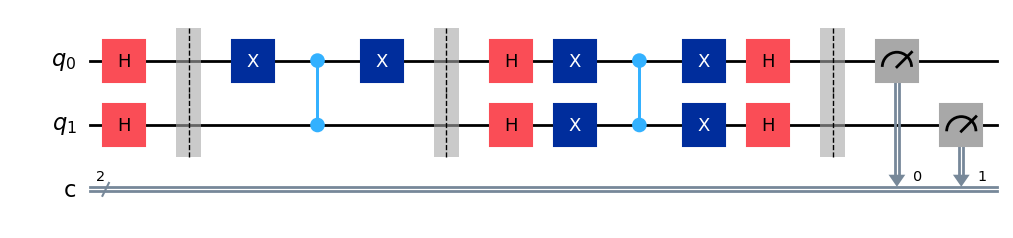

In [133]:
# Create a 2-qubit Grover circuit with target state |01⟩
n_qubits = 2
target_state = "01"
grover_circuit_2q = grover_algorithm(n_qubits, target_state)
print(f"{n_qubits}-qubit Grover's algorithm circuit with target state |{target_state}⟩:")
display(grover_circuit_2q.draw(output='mpl'))

3-qubit Grover's algorithm circuit with target state |101⟩:


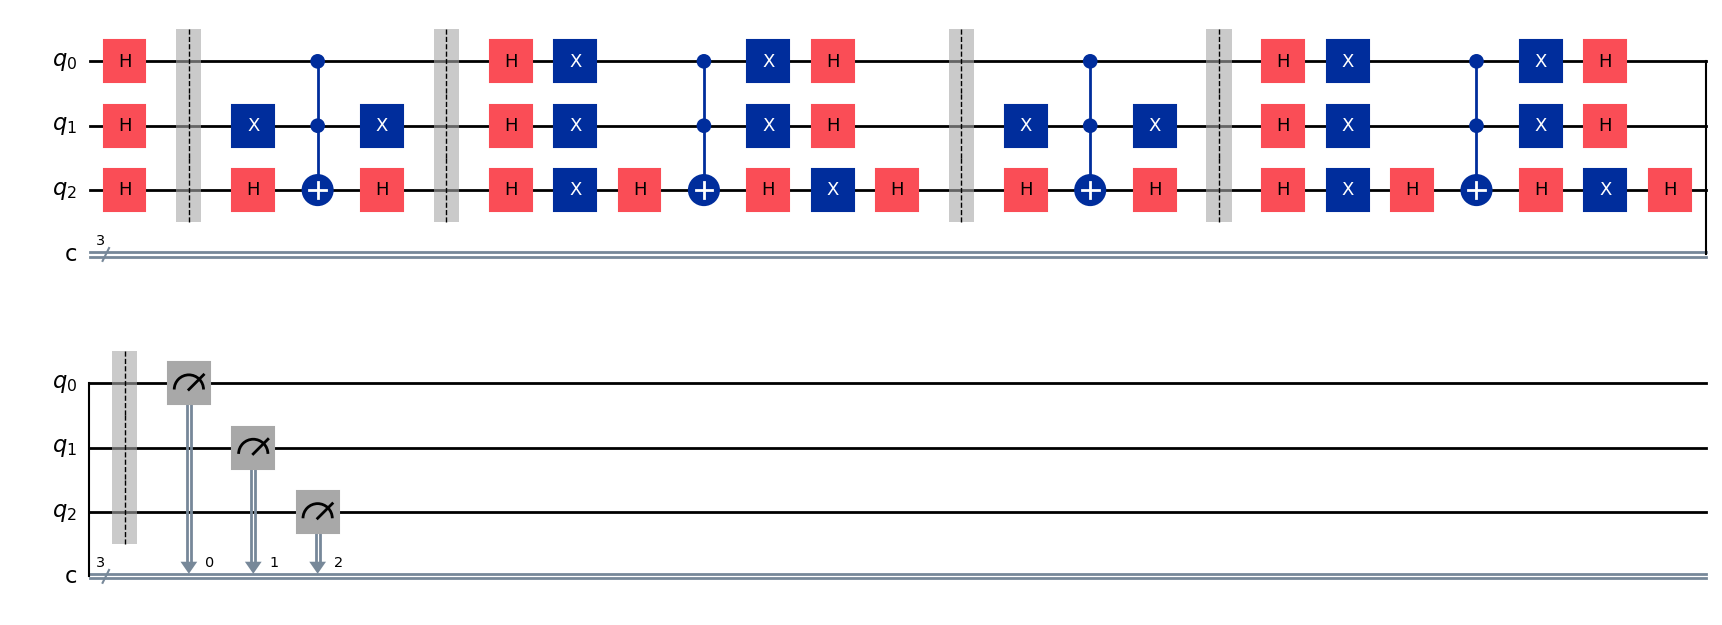

In [134]:
# Create a 3-qubit Grover circuit with target state |101⟩
n_qubits = 3
target_state = "101"
grover_circuit_3q = grover_algorithm(n_qubits, target_state)
print(f"{n_qubits}-qubit Grover's algorithm circuit with target state |{target_state}⟩:")
display(grover_circuit_3q.draw(output='mpl'))

<a id="analysis"></a>
## 6. Analysis and Visualization

Let's run the circuits on a quantum simulator and analyze the results:

Results for 2-qubit Grover's algorithm with target state |01⟩:


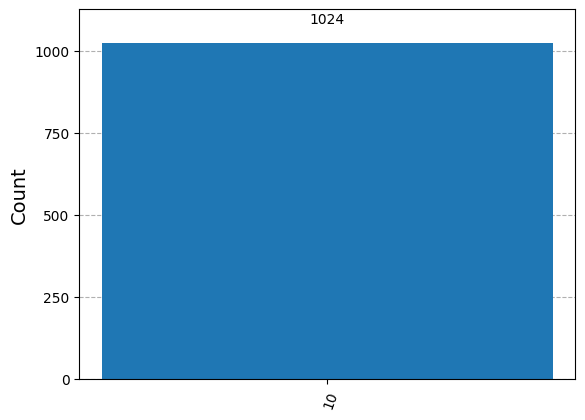

Probability of measuring the target state |01⟩: 0.0000
Theoretical success probability: 1.0000


Results for 3-qubit Grover's algorithm with target state |101⟩:


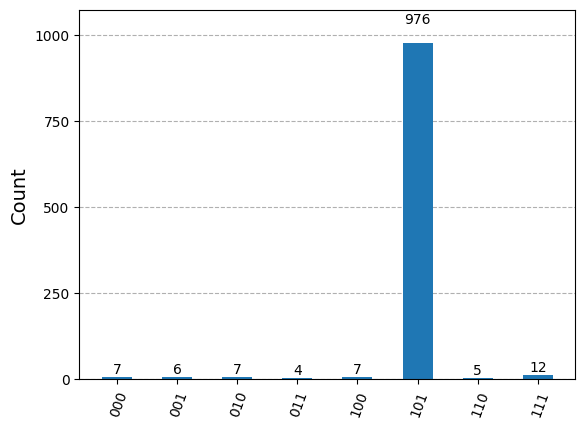

Probability of measuring the target state |101⟩: 0.9531
Theoretical success probability: 0.9453




In [135]:
# Initialize the simulator
simulator = BasicSimulator()

# Function to run the circuit and display results
def run_and_display(circuit, target_state, n_qubits):
    result = simulator.run(circuit, shots=1024).result()
    counts = result.get_counts()
    print(f"Results for {n_qubits}-qubit Grover's algorithm with target state |{target_state}⟩:")
    display(plot_histogram(counts))
    
    # Calculate the success probability
    success_prob = counts.get(target_state, 0) / 1024
    print(f"Probability of measuring the target state |{target_state}⟩: {success_prob:.4f}")
    
    # Calculate the theoretical success probability
    N = 2**n_qubits
    iterations = int(math.pi/4 * math.sqrt(N))
    theta = 2 * math.asin(1/math.sqrt(N))
    theoretical_prob = math.sin((2*iterations + 1) * theta/2)**2
    print(f"Theoretical success probability: {theoretical_prob:.4f}")
    print("\n")
    
    return counts

# Run and display results for the 2-qubit circuit
counts_2q = run_and_display(grover_circuit_2q, target_state="01", n_qubits=2)

# Run and display results for the 3-qubit circuit
counts_3q = run_and_display(grover_circuit_3q, target_state="101", n_qubits=3)

### Visualizing the Quantum States

To better understand how Grover's algorithm works, let's visualize the quantum states at different stages of the algorithm for the 2-qubit case:

State after initialization (uniform superposition):
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


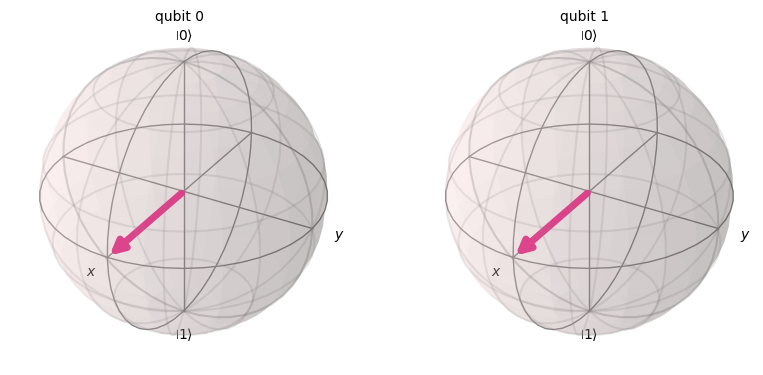


State after applying the oracle (phase flip of target state):
Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j],
            dims=(2, 2))


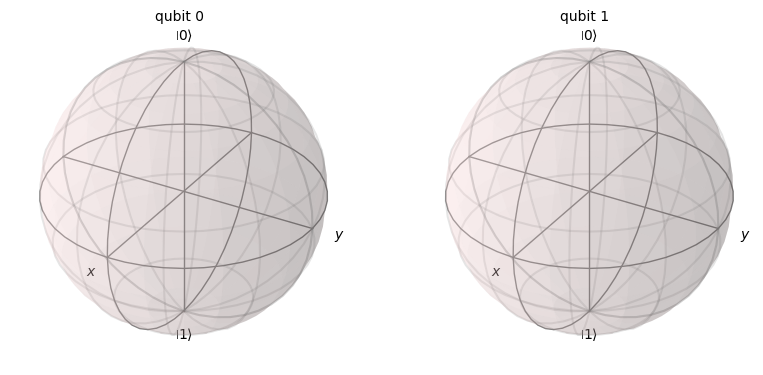


State after applying the diffusion operator (inversion about the mean):
Statevector([ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
            dims=(2, 2))


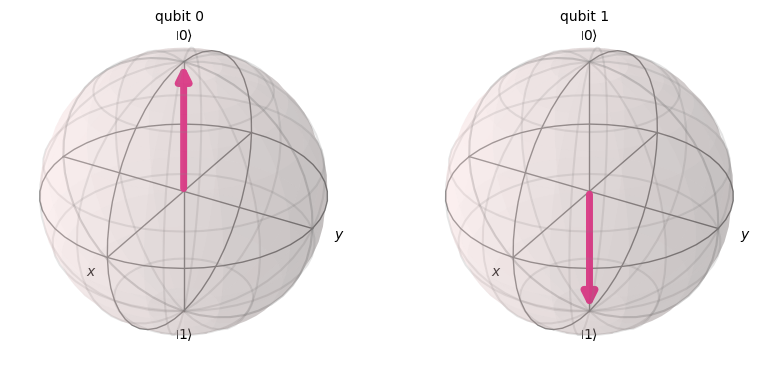

In [136]:
# Create a circuit for visualization (without measurement)
n_qubits = 2
target_state = "01"
vis_circuit = QuantumCircuit(n_qubits)

# Step 1: Initialize in superposition
for qubit in range(n_qubits):
    vis_circuit.h(qubit)
state_after_init = Statevector(vis_circuit)

# Create oracle and diffusion operators
oracle = create_oracle(n_qubits, target_state)
diffusion = create_diffusion(n_qubits)

# Apply the first Grover iteration
vis_circuit = vis_circuit.compose(oracle)
state_after_oracle = Statevector(vis_circuit)

vis_circuit = vis_circuit.compose(diffusion)
state_after_diffusion = Statevector(vis_circuit)

# Display the states
print("State after initialization (uniform superposition):")
print(state_after_init)
display(plot_bloch_multivector(state_after_init))

print("\nState after applying the oracle (phase flip of target state):")
print(state_after_oracle)
display(plot_bloch_multivector(state_after_oracle))

print("\nState after applying the diffusion operator (inversion about the mean):")
print(state_after_diffusion)
display(plot_bloch_multivector(state_after_diffusion))

### Analyzing the Effect of Multiple Iterations

Let's analyze how the probability of measuring the target state changes with the number of Grover iterations:

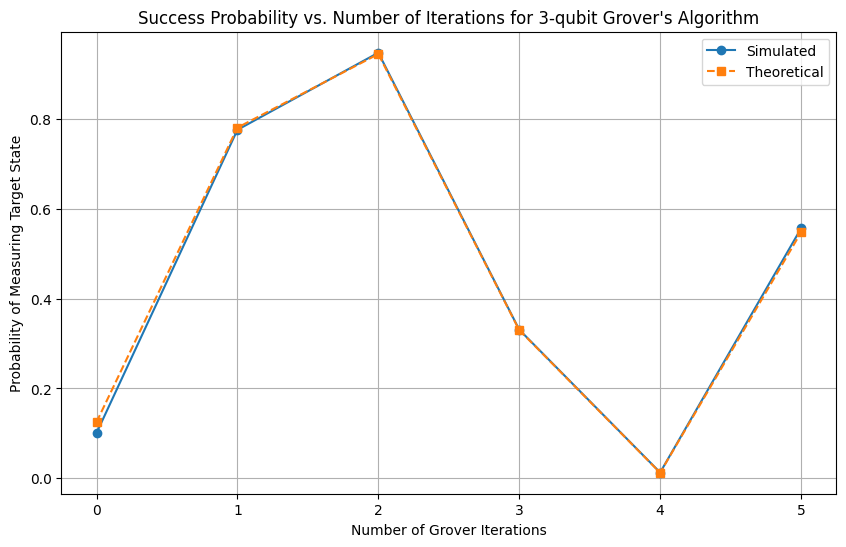

Optimal number of iterations for 3 qubits: 2
Theoretical success probability with optimal iterations: 0.9453


In [137]:
def calculate_success_probability(n_qubits, target_state, iterations):
    """
    Calculate the success probability after a given number of Grover iterations.
    
    Args:
        n_qubits (int): Number of qubits
        target_state (str): Binary string representing the target state
        iterations (int): Number of Grover iterations
    
    Returns:
        float: The probability of measuring the target state
    """
    # Create a circuit with n qubits
    circuit = QuantumCircuit(n_qubits, n_qubits)
    
    # Initialize in superposition
    for qubit in range(n_qubits):
        circuit.h(qubit)
    
    # Apply Grover iterations
    for _ in range(iterations):
        oracle_circuit = create_oracle(n_qubits, target_state)
        circuit = circuit.compose(oracle_circuit)
        
        diffusion_circuit = create_diffusion(n_qubits)
        circuit = circuit.compose(diffusion_circuit)
    
    # Measure all qubits
    circuit.measure(range(n_qubits), range(n_qubits))
    
    # Simulate the circuit
    simulator = BasicSimulator()
    result = simulator.run(circuit, shots=1024).result()
    counts = result.get_counts()
    
    # Calculate the success probability
    success_prob = counts.get(target_state, 0) / 1024
    
    return success_prob

# Calculate the success probability for different numbers of iterations
n_qubits = 3
target_state = "101"
max_iterations = 5

iterations_list = list(range(max_iterations + 1))
probabilities = [calculate_success_probability(n_qubits, target_state, i) for i in iterations_list]

# Calculate the theoretical probabilities
N = 2**n_qubits
theta = 2 * math.asin(1/math.sqrt(N))
theoretical_probs = [math.sin((2*i + 1) * theta/2)**2 for i in iterations_list]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(iterations_list, probabilities, 'o-', label='Simulated')
plt.plot(iterations_list, theoretical_probs, 's--', label='Theoretical')
plt.xlabel('Number of Grover Iterations')
plt.ylabel('Probability of Measuring Target State')
plt.title(f'Success Probability vs. Number of Iterations for {n_qubits}-qubit Grover\'s Algorithm')
plt.grid(True)
plt.legend()
plt.show()

# Calculate the optimal number of iterations
optimal_iterations = int(math.pi/4 * math.sqrt(N))
print(f"Optimal number of iterations for {n_qubits} qubits: {optimal_iterations}")
print(f"Theoretical success probability with optimal iterations: {theoretical_probs[optimal_iterations]:.4f}")

<a id="applications"></a>
## 7. Applications and Extensions

Grover's algorithm has a wide range of applications and has been extended in various ways to solve different problems.

### Applications

1. **Database Search**: The most direct application is searching an unsorted database, which is the problem the algorithm was originally designed to solve.

2. **Solving NP-Complete Problems**: Grover's algorithm can be used to speed up the solution of NP-complete problems, such as the Boolean satisfiability problem (SAT), the traveling salesman problem, and graph coloring.

3. **Cryptanalysis**: The algorithm can be used to attack symmetric cryptographic systems by searching for the secret key. For example, it can reduce the security of AES-128 from 128 bits to 64 bits (square root of 2^128).

4. **Optimization Problems**: Grover's algorithm can be used to find the minimum or maximum value of a function, which is useful for optimization problems.

5. **Quantum Machine Learning**: The algorithm can be used as a subroutine in quantum machine learning algorithms, such as quantum support vector machines and quantum neural networks.

### Extensions

1. **Multiple Solutions**: Grover's algorithm can be extended to handle the case where there are multiple solutions. The optimal number of iterations becomes $r \approx \frac{\pi}{4}\sqrt{\frac{N}{M}}$, where $M$ is the number of solutions.

2. **Amplitude Amplification**: Grover's algorithm can be generalized to a technique called amplitude amplification, which can be used to enhance the success probability of any quantum algorithm that has a non-zero probability of success.

3. **Fixed-Point Search**: The original Grover's algorithm can overshoot the target state if too many iterations are performed. Fixed-point search is a modification that ensures the algorithm converges to the target state regardless of the number of iterations.

4. **Partial Search**: In some cases, we may only need to find a partial solution or a subset of the target items. Partial search algorithms have been developed for these scenarios.

5. **Quantum Counting**: By combining Grover's algorithm with the quantum Fourier transform, we can estimate the number of solutions to a search problem, which is useful when we don't know how many solutions exist.

### Example: Solving the 3-SAT Problem

The 3-SAT problem is a classic NP-complete problem where we need to find an assignment of boolean variables that satisfies a boolean formula in conjunctive normal form (CNF) with 3 literals per clause.

For example, consider the formula $(x_1 \lor x_2 \lor \neg x_3) \land (\neg x_1 \lor x_2 \lor x_4) \land (x_2 \lor \neg x_3 \lor \neg x_4)$.

To solve this using Grover's algorithm:
1. We encode the problem as a function $f(x)$ that returns 1 if the assignment $x$ satisfies the formula, and 0 otherwise.
2. We use Grover's algorithm to find an input $x$ such that $f(x) = 1$.

The classical approach would require checking up to $2^n$ assignments in the worst case, where $n$ is the number of variables. Grover's algorithm reduces this to $O(\sqrt{2^n}) = O(2^{n/2})$, which is a quadratic speedup.

<a id="conclusion"></a>
## 8. Conclusion and Significance

Grover's algorithm is one of the most important quantum algorithms and demonstrates a provable quantum advantage for a practical problem. While the quadratic speedup it provides is not as dramatic as the exponential speedup of Shor's algorithm, it is still significant and applies to a broader class of problems.

### Key Takeaways

1. **Quadratic Speedup**: Grover's algorithm provides a quadratic speedup over classical algorithms for unstructured search problems, reducing the complexity from $O(N)$ to $O(\sqrt{N})$.

2. **Broad Applicability**: The algorithm can be applied to a wide range of problems, including database search, NP-complete problems, cryptanalysis, and optimization.

3. **Optimal Quantum Algorithm**: It has been proven that Grover's algorithm is optimal; no quantum algorithm can solve the unstructured search problem with fewer than $O(\sqrt{N})$ operations.

4. **Practical Importance**: The algorithm has practical importance for quantum computing, as it can be used as a subroutine in many other quantum algorithms.

5. **Conceptual Significance**: The algorithm introduces important concepts like amplitude amplification and the diffusion operator, which have been used in many other quantum algorithms.

### Limitations

1. **Quadratic vs. Exponential**: The speedup is quadratic, not exponential, which means that for very large problems, classical algorithms with better structure (e.g., hash tables, binary search trees) might still be more efficient.

2. **Requires Quantum Oracle**: The algorithm requires a quantum oracle that can evaluate the search function in superposition, which might be difficult to implement for some problems.

3. **Sensitive to Noise**: Like all quantum algorithms, Grover's algorithm is sensitive to noise and requires error correction for practical implementation on large-scale problems.

### Future Directions

1. **Hybrid Algorithms**: Combining Grover's algorithm with classical algorithms to create hybrid approaches that leverage the strengths of both.

2. **Noise-Resilient Variants**: Developing variants of the algorithm that are more resilient to noise and can be implemented on near-term quantum devices.

3. **Application-Specific Optimizations**: Tailoring the algorithm for specific applications to achieve better performance.

4. **Integration with Quantum Machine Learning**: Using Grover's algorithm as a subroutine in quantum machine learning algorithms to enhance their performance.

Grover's algorithm remains a cornerstone of quantum computing and continues to inspire new research and applications in the field.

<a id="references"></a>
## 9. References

1. Grover, L. K. (1996). A fast quantum mechanical algorithm for database search. Proceedings of the 28th Annual ACM Symposium on Theory of Computing, 212-219.

2. Grover, L. K. (1997). Quantum mechanics helps in searching for a needle in a haystack. Physical Review Letters, 79(2), 325-328.

3. Nielsen, M. A., & Chuang, I. L. (2010). Quantum Computation and Quantum Information. Cambridge University Press.

4. Qiskit Documentation: https://qiskit.org/documentation/

5. IBM Quantum Learning Resources: https://learning.quantum.ibm.com/

6. Wong, T. G. (2022). Introduction to classical and quantum computing. Rooted Grove. Retrieved from https://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e4p.pdf

7. Mermin, N. D. (2007). Quantum Computer Science: An Introduction. Cambridge University Press.

8. Brassard, G., Høyer, P., Mosca, M., & Tapp, A. (2002). Quantum amplitude amplification and estimation. Contemporary Mathematics, 305, 53-74.

9. Bennett, C. H., Bernstein, E., Brassard, G., & Vazirani, U. (1997). Strengths and weaknesses of quantum computing. SIAM Journal on Computing, 26(5), 1510-1523.